In [4]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = 18,8

In [5]:
def extract_data(path, wl, t='10.0sec', ori = "unk"):
    
    f = h5.File(path, 'r')
    gp = f['spectra'][wl][ori][t]
    
    sp_data = gp['sp_data']; bg_data = gp['bg_data']; powers = gp['power_samples']
    
    return sp_data, bg_data, powers

def gaussian(x,m,s,A):
    return A * np.exp(-(x-m)**2/(2*s**2))

def two_gauss(x,m1,m2,s1,s2,A1,A2):
    return gaussian(x,m1,s1,A1) + gaussian(x,m2,s2,A2)

In [6]:
path_to_study = "/home/hargy/Documents/3CS/repo_data3cs/data3cs/studies/mono_leakage_2"

In [7]:
# black holder
b_H2O_0_path = f'{path_to_study}/coll1/H20_0.hdf5'
b_H2O_1_path = f'{path_to_study}/coll1/H20_1.hdf5'
b_MIR_0_path = f'{path_to_study}/coll1/MIR_0.hdf5'
b_MIR_1_path = f'{path_to_study}/coll1/MIR_1.hdf5'

# plastic holder
p_H2O_0_path = f'{path_to_study}/coll2/H2O_0.hdf5'
p_H2O_1_path = f'{path_to_study}/coll2/H2O_1.hdf5'
p_MIR_0_path = f'{path_to_study}/coll2/MIR_0.hdf5'

# coll 3
p3_H2O_0_path = f'{path_to_study}/coll3/H2O_0.hdf5'
p3_H2O_1_path = f'{path_to_study}/coll3/H2O_1.hdf5'
p3_MIR_0_path = f'{path_to_study}/coll3/MIR_0.hdf5'
p3_MIR_1_path = f'{path_to_study}/coll3/MIR_1.hdf5'

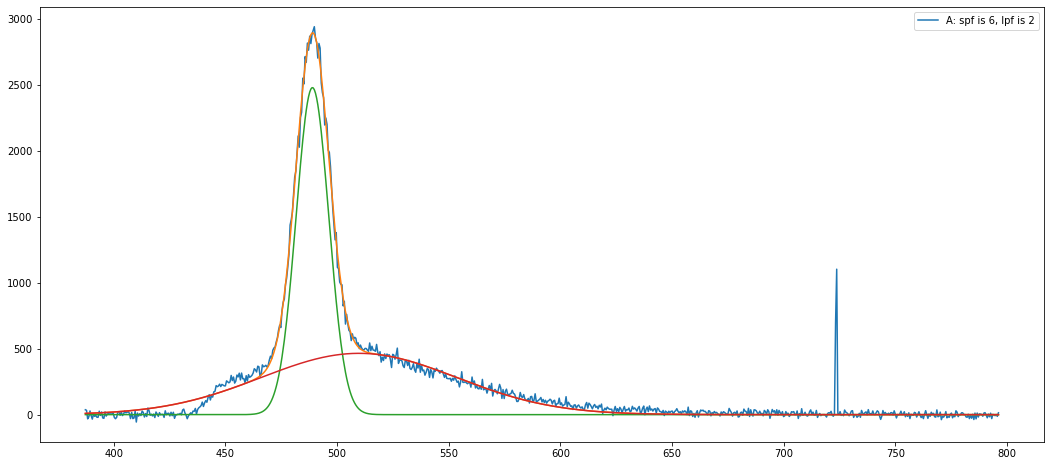

In [59]:
it = 1

bg_A = extract_data(b_H2O_0_path, '425')[1][0]

sp_A = extract_data(b_H2O_0_path, '425')[0][it]

sub = np.subtract(sp_A['count'],bg_A['count'])

#sp_B = extract_data(b_H2O_1_path, '425')[0][it]

f_A = h5.File(b_H2O_0_path, 'r'); spf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['lpf']
#f_B = h5.File(b_H2O_1_path, 'r'); spf_B = f_B['spectra']['425']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['425']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sub, label = f'A: spf is {spf_A}, lpf is {lpf_A}')
#plt.plot(sp_A['em_wl'], bg_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}')
#plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}')
plt.legend()

popt, pcov = curve_fit(two_gauss,sp_A['em_wl'], sub, p0=[500,500,20,80,3000,800])
plt.plot(sp_A['em_wl'], two_gauss(sp_A['em_wl'], *popt))
plt.plot(sp_A['em_wl'], gaussian(sp_A['em_wl'], popt[0], popt[2], popt[4]))
plt.plot(sp_A['em_wl'], gaussian(sp_A['em_wl'], popt[1], popt[3], popt[5]))

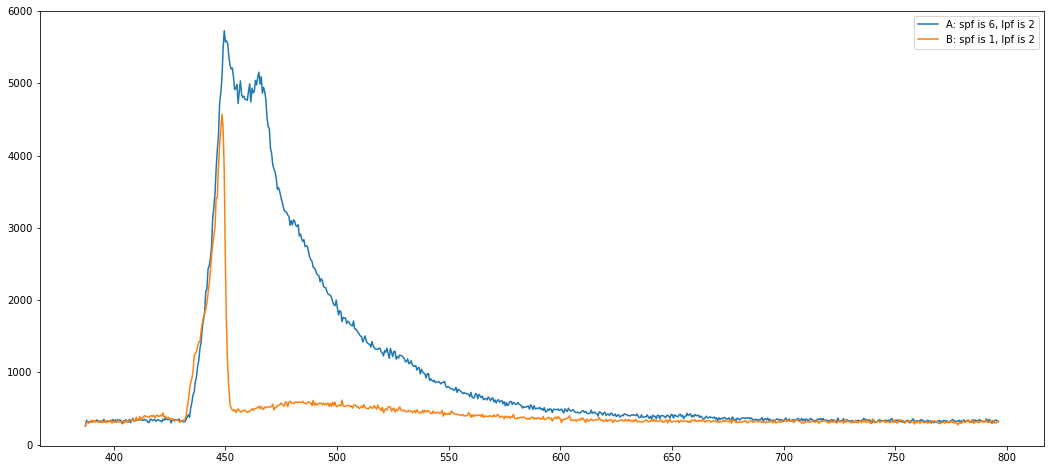

In [30]:
it = 1

sp_A = extract_data(b_MIR_0_path, '425')[0][it]
sp_B = extract_data(b_MIR_1_path, '425')[0][it]

f_A = h5.File(b_MIR_0_path, 'r'); spf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(b_MIR_1_path, 'r'); spf_B = f_B['spectra']['425']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['425']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}')
plt.legend()

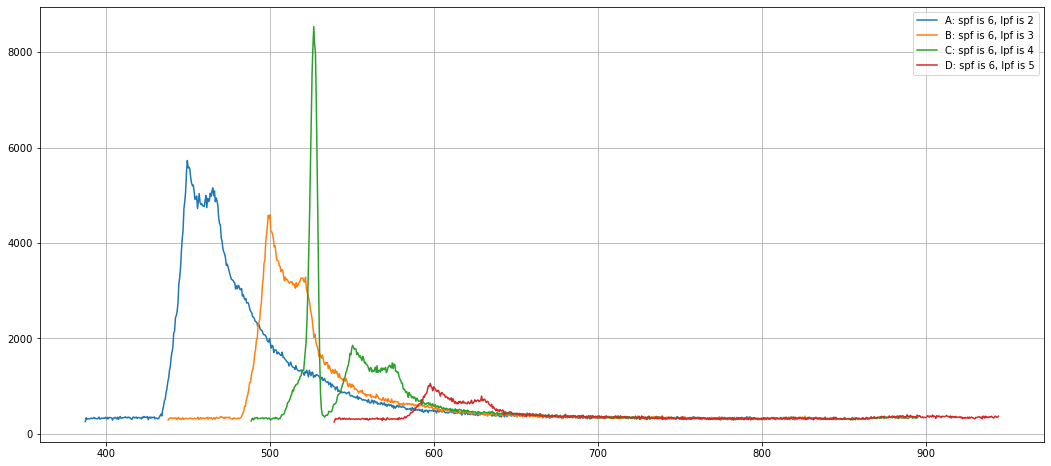

In [42]:
it = 1

sp_A = extract_data(b_MIR_0_path, '425')[0][it]
sp_B = extract_data(b_MIR_0_path, '475')[0][it]
sp_C = extract_data(b_MIR_0_path, '525')[0][it]
sp_D = extract_data(b_MIR_0_path, '575')[0][it]

f_A = h5.File(b_MIR_0_path, 'r'); spf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(b_MIR_0_path, 'r'); spf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(b_MIR_0_path, 'r'); spf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(b_MIR_0_path, 'r'); spf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}')
plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}')
plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}')
plt.legend()
plt.grid("on")

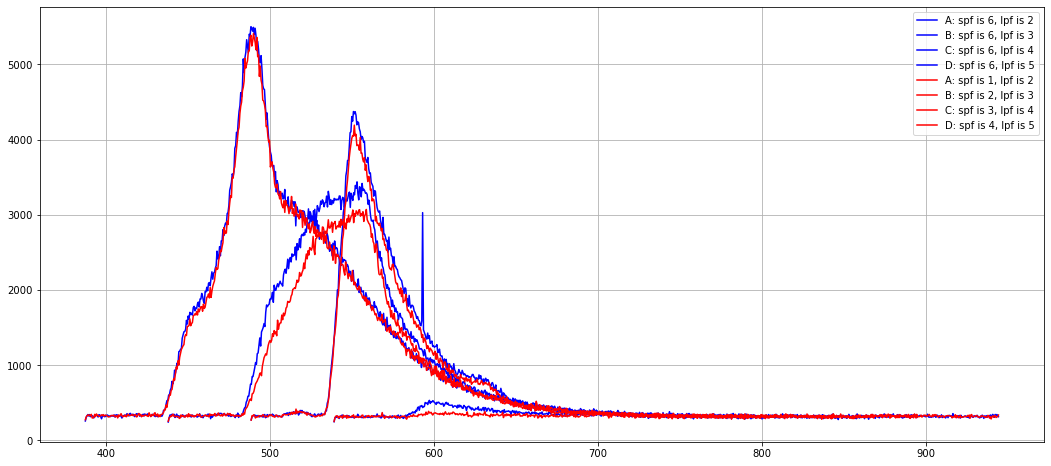

In [55]:
it = 1

sp_A = extract_data(p_H2O_0_path, '425')[0][it]
sp_B = extract_data(p_H2O_0_path, '475')[0][it]
sp_C = extract_data(p_H2O_0_path, '525')[0][it]
sp_D = extract_data(p_H2O_0_path, '575')[0][it]

f_A = h5.File(p_H2O_0_path, 'r'); spf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p_H2O_0_path, 'r'); spf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p_H2O_0_path, 'r'); spf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p_H2O_0_path, 'r'); spf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='blue')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='blue')
plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}', color='blue')
plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}', color='blue')


sp_A = extract_data(p_H2O_1_path, '425')[0][it]
sp_B = extract_data(p_H2O_1_path, '475')[0][it]
sp_C = extract_data(p_H2O_1_path, '525')[0][it]
sp_D = extract_data(p_H2O_1_path, '575')[0][it]

f_A = h5.File(p_H2O_1_path, 'r'); spf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p_H2O_1_path, 'r'); spf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p_H2O_1_path, 'r'); spf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p_H2O_1_path, 'r'); spf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='red')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='red')
plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}', color='red')
plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}', color='red')

plt.legend()
plt.grid("on")
#plt.ylim(275,1000)

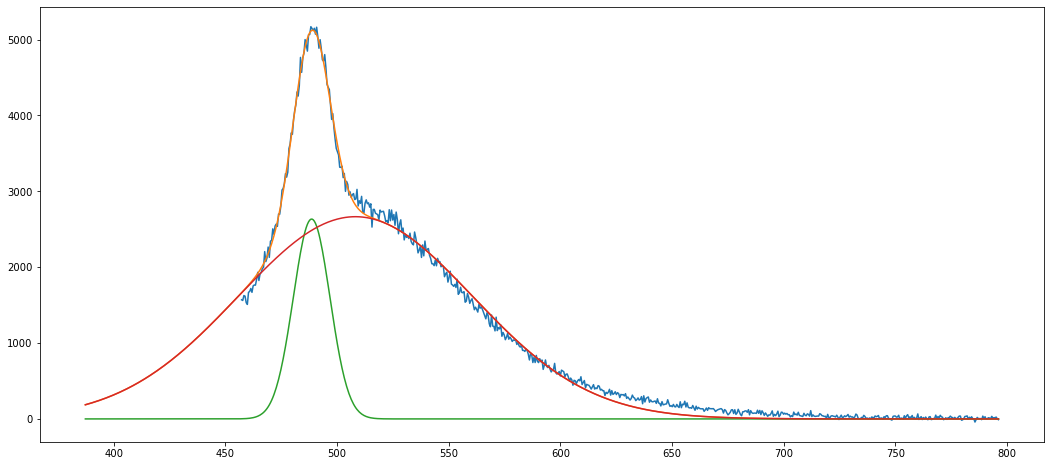

In [81]:
it = 1
start = 135

bg_A = extract_data(p_H2O_0_path, '425')[1][it]
sp_A = extract_data(p_H2O_0_path, '425')[0][it]
wl_full = sp_A['em_wl']
wl   = wl_full[start:]
sub  = np.subtract(sp_A['count'], bg_A['count'])[start:]

plt.plot(wl,sub)
popt, pcov = curve_fit(two_gauss,wl, sub, p0=[500,500,20,80,3000,800])
plt.plot(wl_full, two_gauss(wl_full, *popt))
plt.plot(wl_full, gaussian(wl_full, popt[0], popt[2], popt[4]))
plt.plot(wl_full, gaussian(wl_full, popt[1], popt[3], popt[5]))

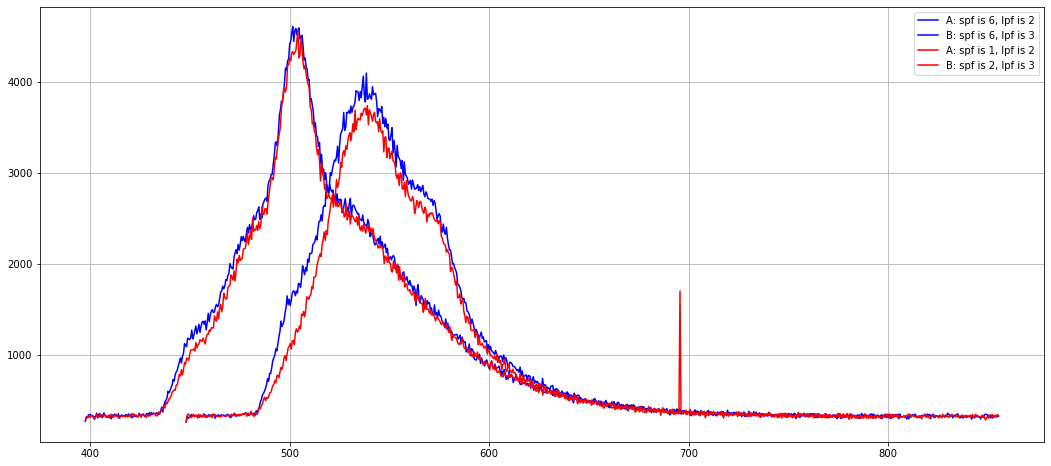

In [61]:
it = 1

sp_A = extract_data(p3_H2O_0_path, '435')[0][it]
sp_B = extract_data(p3_H2O_0_path, '485')[0][it]
sp_C = extract_data(p3_H2O_0_path, '535')[0][it]
sp_D = extract_data(p3_H2O_0_path, '585')[0][it]

f_A = h5.File(p3_H2O_0_path, 'r'); spf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p3_H2O_0_path, 'r'); spf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p3_H2O_0_path, 'r'); spf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p3_H2O_0_path, 'r'); spf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='blue')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='blue')
#plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}', color='blue')
#plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}', color='blue')


sp_A = extract_data(p3_H2O_1_path, '435')[0][it]
sp_B = extract_data(p3_H2O_1_path, '485')[0][it]
sp_C = extract_data(p3_H2O_1_path, '535')[0][it]
sp_D = extract_data(p3_H2O_1_path, '585')[0][it]

f_A = h5.File(p3_H2O_1_path, 'r'); spf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p3_H2O_1_path, 'r'); spf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p3_H2O_1_path, 'r'); spf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p3_H2O_1_path, 'r'); spf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='red')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='red')
#plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}', color='red')
#plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}', color='red')

plt.legend()
plt.grid("on")
#plt.ylim(275,1000)

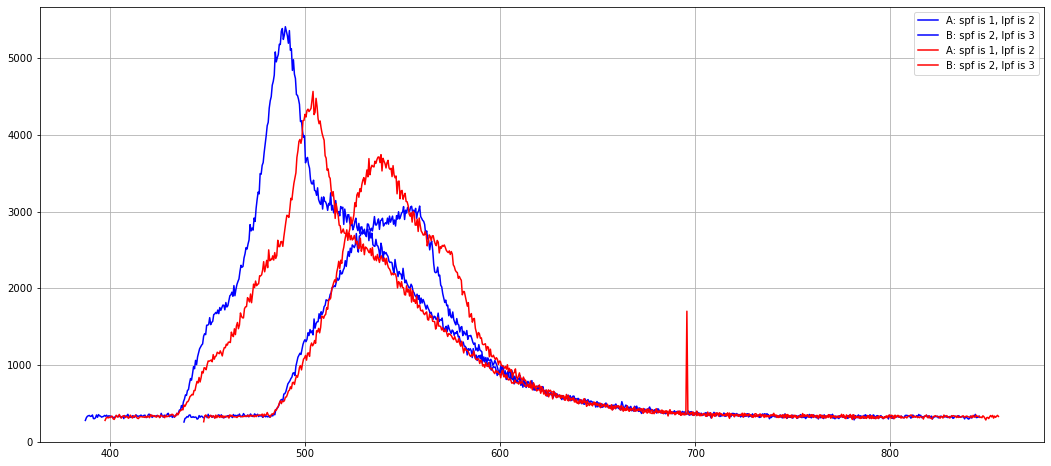

In [62]:
it = 1

sp_A = extract_data(p_H2O_1_path, '425')[0][it]
sp_B = extract_data(p_H2O_1_path, '475')[0][it]
sp_C = extract_data(p_H2O_1_path, '525')[0][it]
sp_D = extract_data(p_H2O_1_path, '575')[0][it]

f_A = h5.File(p_H2O_1_path, 'r'); spf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p_H2O_1_path, 'r'); spf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p_H2O_1_path, 'r'); spf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p_H2O_1_path, 'r'); spf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='blue')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='blue')
#plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}', color='blue')
#plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}', color='blue')

sp_A = extract_data(p3_H2O_1_path, '435')[0][it]
sp_B = extract_data(p3_H2O_1_path, '485')[0][it]
sp_C = extract_data(p3_H2O_1_path, '535')[0][it]
sp_D = extract_data(p3_H2O_1_path, '585')[0][it]

f_A = h5.File(p3_H2O_1_path, 'r'); spf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p3_H2O_1_path, 'r'); spf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p3_H2O_1_path, 'r'); spf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p3_H2O_1_path, 'r'); spf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='red')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='red')
#plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}', color='red')
#plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}', color='red')

plt.legend()
plt.grid("on")

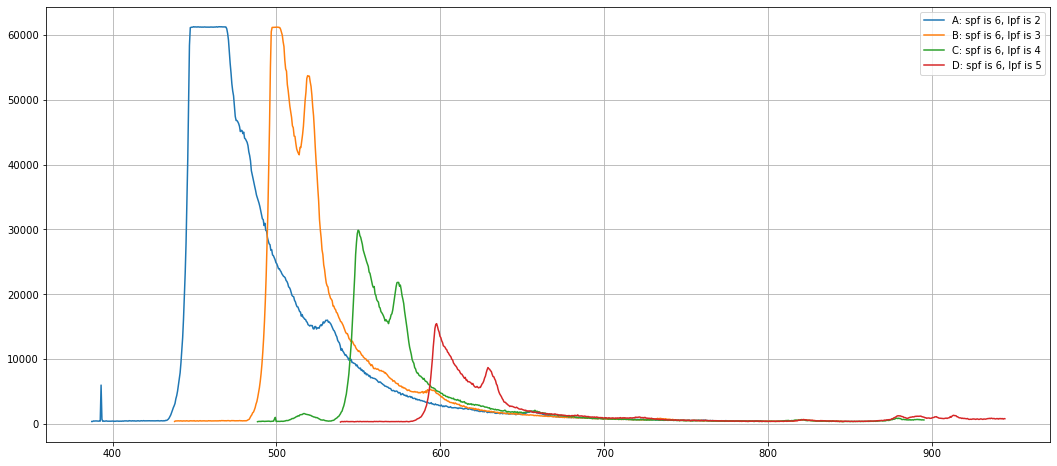

In [44]:
it = 1

sp_A = extract_data(p_MIR_0_path, '425')[0][it]
sp_B = extract_data(p_MIR_0_path, '475')[0][it]
sp_C = extract_data(p_MIR_0_path, '525')[0][it]
sp_D = extract_data(p_MIR_0_path, '575')[0][it]

f_A = h5.File(p_MIR_0_path, 'r'); spf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p_MIR_0_path, 'r'); spf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p_MIR_0_path, 'r'); spf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p_MIR_0_path, 'r'); spf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}')
plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}')
plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}')
plt.legend()
plt.grid("on")

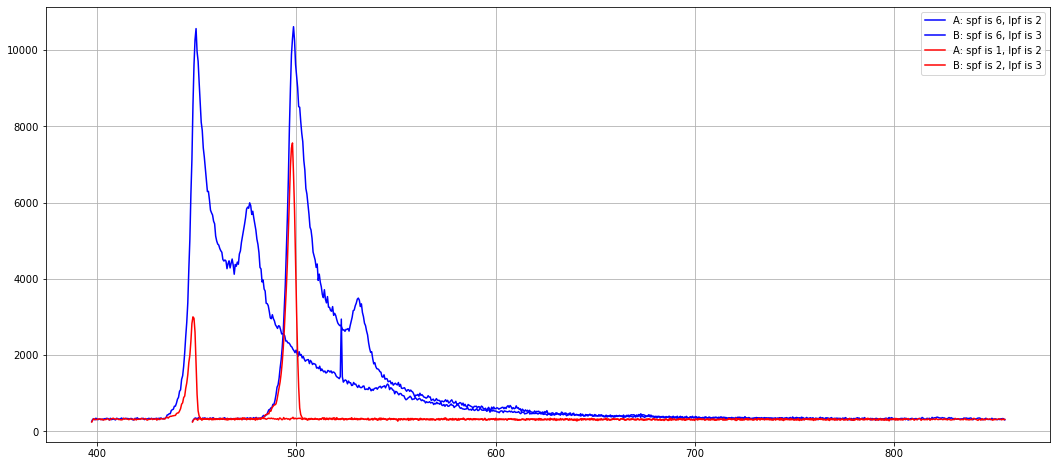

In [65]:
it = 1

sp_A = extract_data(p3_MIR_0_path, '435')[0][it]
sp_B = extract_data(p3_MIR_0_path, '485')[0][it]
sp_C = extract_data(p3_MIR_0_path, '535')[0][it]
sp_D = extract_data(p3_MIR_0_path, '585')[0][it]

f_A = h5.File(p3_MIR_0_path, 'r'); spf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p3_MIR_0_path, 'r'); spf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p3_MIR_0_path, 'r'); spf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p3_MIR_0_path, 'r'); spf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='blue')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='blue')
#plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}', color='blue')
#plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}', color='blue')


sp_A = extract_data(p3_MIR_1_path, '435')[0][it]
sp_B = extract_data(p3_MIR_1_path, '485')[0][it]
sp_C = extract_data(p3_MIR_1_path, '535')[0][it]
sp_D = extract_data(p3_MIR_1_path, '585')[0][it]

f_A = h5.File(p3_MIR_1_path, 'r'); spf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p3_MIR_1_path, 'r'); spf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p3_MIR_1_path, 'r'); spf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p3_MIR_1_path, 'r'); spf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='red')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='red')
#plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}', color='red')
#plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}', color='red')

plt.legend()
plt.grid("on")
#plt.ylim(275,1000)

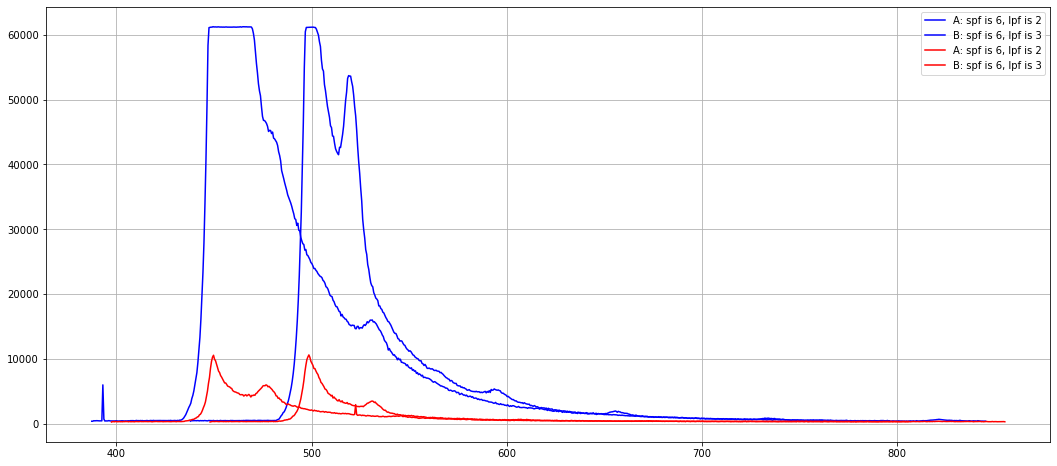

In [71]:
it = 1

sp_A = extract_data(p_MIR_0_path, '425')[0][it]
sp_B = extract_data(p_MIR_0_path, '475')[0][it]
sp_C = extract_data(p_MIR_0_path, '525')[0][it]
sp_D = extract_data(p_MIR_0_path, '575')[0][it]

f_A = h5.File(p_MIR_0_path, 'r'); spf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p_MIR_0_path, 'r'); spf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p_MIR_0_path, 'r'); spf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p_MIR_0_path, 'r'); spf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='blue')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='blue')
#plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}')
#plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}')


sp_A = extract_data(p3_MIR_0_path, '435')[0][it]
sp_B = extract_data(p3_MIR_0_path, '485')[0][it]
sp_C = extract_data(p3_MIR_0_path, '535')[0][it]
sp_D = extract_data(p3_MIR_0_path, '585')[0][it]

f_A = h5.File(p3_MIR_0_path, 'r'); spf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p3_MIR_0_path, 'r'); spf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p3_MIR_0_path, 'r'); spf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p3_MIR_0_path, 'r'); spf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='red')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='red')
#plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}', color='red')
#plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}', color='red')

plt.legend()
plt.grid("on")
#plt.ylim(275,1000)

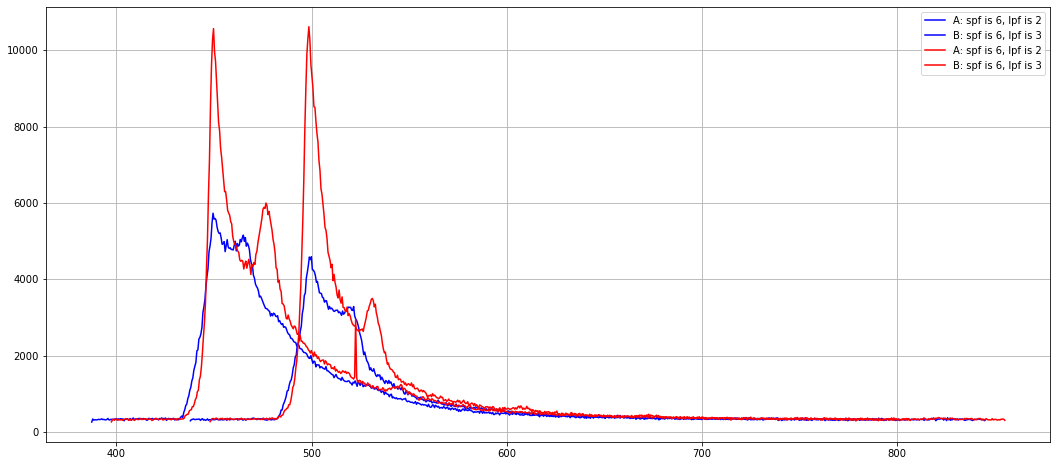

In [73]:
it = 1

sp_A = extract_data(b_MIR_0_path, '425')[0][it]
sp_B = extract_data(b_MIR_0_path, '475')[0][it]
sp_C = extract_data(b_MIR_0_path, '525')[0][it]
sp_D = extract_data(b_MIR_0_path, '575')[0][it]

f_A = h5.File(b_MIR_0_path, 'r'); spf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['425']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(b_MIR_0_path, 'r'); spf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['475']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(b_MIR_0_path, 'r'); spf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['525']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(b_MIR_0_path, 'r'); spf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['575']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='blue')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='blue')
#plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}')
#plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}')


sp_A = extract_data(p3_MIR_0_path, '435')[0][it]
sp_B = extract_data(p3_MIR_0_path, '485')[0][it]
sp_C = extract_data(p3_MIR_0_path, '535')[0][it]
sp_D = extract_data(p3_MIR_0_path, '585')[0][it]

f_A = h5.File(p3_MIR_0_path, 'r'); spf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['spf']; lpf_A = f_A['spectra']['435']['unk']['10.0sec'].attrs['lpf']
f_B = h5.File(p3_MIR_0_path, 'r'); spf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['spf']; lpf_B = f_B['spectra']['485']['unk']['10.0sec'].attrs['lpf']
f_C = h5.File(p3_MIR_0_path, 'r'); spf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['spf']; lpf_C = f_C['spectra']['535']['unk']['10.0sec'].attrs['lpf']
f_D = h5.File(p3_MIR_0_path, 'r'); spf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['spf']; lpf_D = f_D['spectra']['585']['unk']['10.0sec'].attrs['lpf']

plt.plot(sp_A['em_wl'], sp_A['count'], label = f'A: spf is {spf_A}, lpf is {lpf_A}', color='red')
plt.plot(sp_B['em_wl'], sp_B['count'], label = f'B: spf is {spf_B}, lpf is {lpf_B}', color='red')
#plt.plot(sp_C['em_wl'], sp_C['count'], label = f'C: spf is {spf_C}, lpf is {lpf_C}', color='red')
#plt.plot(sp_D['em_wl'], sp_D['count'], label = f'D: spf is {spf_D}, lpf is {lpf_D}', color='red')

plt.legend()
plt.grid("on")

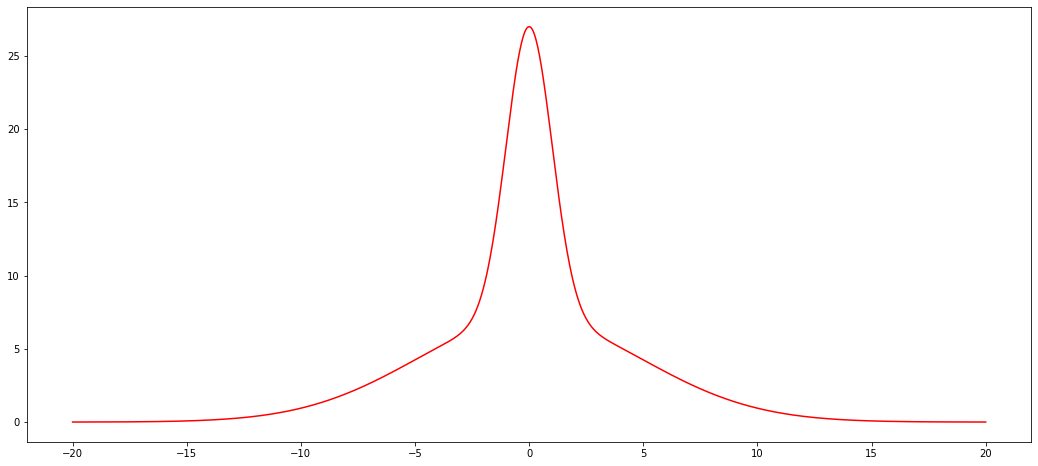

In [22]:
m1, m2, s1, s2, A1, A2 = 0, 0 ,1, 5, 20, 7
x = np.linspace(-20, 20, 1000)
plt.plot(x, two_gauss(x,m1,m2,s1,s2,A1,A2), color='red')

In [8]:
f = h5.File(b_H2O_0_path, 'r');

In [10]:
list(f['system'].keys())

['energetiq',
 'filter_wheel_A',
 'filter_wheel_B',
 'filter_wheel_C',
 'flipperB',
 'holder_1',
 'horiba_microhr',
 'pm_a',
 'pm_b',
 'pm_t',
 'spectro']

In [14]:
list(f['system']['energetiq'].attrs.keys())

['S/N', 'function', 'model']

In [44]:
f['system']['filter_wheel_A'].attrs['1']

'FESH0450'

In [20]:
list(f['system']['filter_wheel_B'].attrs.keys())

['1', '2', '3', '4', '5', '6', 'S/N', 'function', 'model']

In [48]:
f['system']['filter_wheel_C'].attrs['3']

'FELH0750'

In [40]:
f['system']['flipperB'].attrs['model']

'MFF101'

In [23]:
list(f['system']['holder_1'].attrs.keys())

['comments', 'model']

In [41]:
f['system']['pm_a'].attrs['model']

'S120VC'

In [25]:
list(f['system']['pm_b'].attrs.keys())

['S/N', 'function', 'model']

In [42]:
f['system']['pm_t'].attrs['model']

'S401C'

In [43]:
f['system']['spectro'].attrs['model']

'SR-193i-A'

In [28]:
f['system']['energetiq'].attrs['model']

'Energetiq EQ-77'

In [35]:
a = ['dev1', 'dev2', 'dev3']
b = [1,2,3]
df = pd.DataFrame(data = [a,b])

In [36]:
df

,0,1,2
0,dev1,dev2,dev3
1,1,2,3


In [32]:
sys_dict

{'key1': 3}

In [33]:
import pandas as pd

In [34]:
df = pd.DataFrame(sys_dict)

ValueError: If using all scalar values, you must pass an index

In [50]:
np.sqrt(3)

1.7320508075688772